In [16]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

def generate_data(num_points):
    
    x = np.random.uniform(-10, 20, num_points)
    y = np.random.uniform(-10, 20, num_points)
    z = np.random.uniform(-10, 20, num_points)
    
    surface = 8 - (x-3)**2 - (y-5)**2
   
    labels = np.zeros(num_points, dtype=int)
    for i in range(num_points):
        if z[i] > surface[i]:
            labels[i] = 1
        else:
            labels[i] = 0
    
    print(np.column_stack((x, y, z)).shape)
    
    return np.column_stack((x, y, z)), labels


train_data, train_labels = generate_data(10000)
test_data, test_labels = generate_data(2000)



(10000, 3)
(2000, 3)


In [17]:
loss_per_epoch = []
accuracy_per_epoch = []

In [18]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size      
        self.hidden_size = hidden_size  
        self.output_size = output_size      

        # input -> hidden 1
        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.zeros((1, self.hidden_size))

        # hidden 1 -> hidden 2
        self.W2 = np.random.randn(self.hidden_size, self.hidden_size)
        self.b2 = np.zeros((1, self.hidden_size))

        # hidden 2 -> hidden 3
        self.W3 = np.random.randn(self.hidden_size, self.hidden_size)
        self.b3 = np.zeros((1, self.hidden_size))

        # hidden 3 -> output
        self.W4 = np.random.randn(self.hidden_size, self.output_size)
        self.b4 = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, a):
        return a * (1 - a)

    def forward(self, X):
        # Layer 1
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)

        # Layer 2
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)

        # Layer 3
        self.z3 = np.dot(self.a2, self.W3) + self.b3
        self.a3 = self.sigmoid(self.z3)

        # Output layer
        self.z4 = np.dot(self.a3, self.W4) + self.b4
        self.a4 = self.sigmoid(self.z4)

        return self.a4

    def backward(self, X, y, learning_rate=0.1):
        m = X.shape[0]
        y_col = y.reshape(-1, 1)

        # Output
        error4 = 2 * (self.a4 - y_col) * self.sigmoid_derivative(self.a4)

        weight_gradient_4 = np.dot(self.a3.T, error4) / m
        bias_gradient_4 = np.sum(error4, axis=0, keepdims=True) / m

        # Layer 3
        error3 = np.dot(error4, self.W4.T) * self.sigmoid_derivative(self.a3)
        weight_gradient_3 = np.dot(self.a2.T, error3) / m
        bias_gradient_3 = np.sum(error3, axis=0, keepdims=True) / m

        # Layer 2
        error2 = np.dot(error3, self.W3.T) * self.sigmoid_derivative(self.a2)
        weight_gradient_2 = np.dot(self.a1.T, error2) / m
        bias_gradient_2 = np.sum(error2, axis=0, keepdims=True) / m

        # Layer 1
        error1 = np.dot(error2, self.W2.T) * self.sigmoid_derivative(self.a1)
        weight_gradient_1 = np.dot(X.T, error1) / m
        bias_gradient_1 = np.sum(error1, axis=0, keepdims=True) / m

        
        self.W4 -= learning_rate * weight_gradient_4
        self.b4 -= learning_rate * bias_gradient_4

        self.W3 -= learning_rate * weight_gradient_3
        self.b3 -= learning_rate * bias_gradient_3

        self.W2 -= learning_rate * weight_gradient_2
        self.b2 -= learning_rate * bias_gradient_2

        self.W1 -= learning_rate * weight_gradient_1
        self.b1 -= learning_rate * bias_gradient_1

    def train(self, X, y, epochs, learning_rate):

        loss_per_epoch.clear()
        
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X, y, learning_rate)

            
            y_col = y.reshape(-1, 1)
            
            loss_per_epoch.append(np.mean((y_col - self.a4) ** 2))

            if epoch % 10 == 0:
                loss = np.mean((y_col - self.a4) ** 2)
                print(f"Epoch {epoch}/{epochs} - Loss: {loss:.6f}")
                
                # loss_per_epoch.append(loss)

                


In [19]:
nn = NeuralNetwork(input_size=3, hidden_size=10, output_size=1)

nn.train(train_data, train_labels, epochs=100, learning_rate=0.1)



Epoch 0/100 - Loss: 0.194385
Epoch 10/100 - Loss: 0.091046
Epoch 20/100 - Loss: 0.058499
Epoch 30/100 - Loss: 0.044890
Epoch 40/100 - Loss: 0.037863
Epoch 50/100 - Loss: 0.033703
Epoch 60/100 - Loss: 0.031001
Epoch 70/100 - Loss: 0.029127
Epoch 80/100 - Loss: 0.027762
Epoch 90/100 - Loss: 0.026729


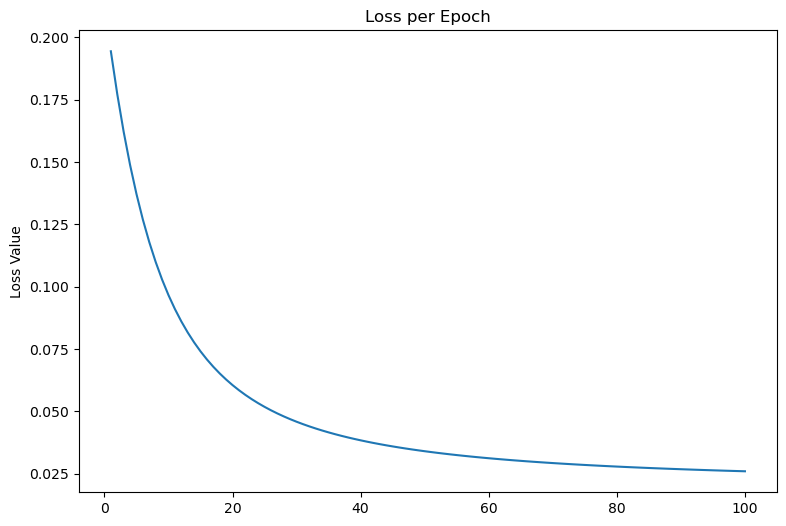

In [20]:
x_labels = range(1, loss_per_epoch.__len__() + 1)

plt.figure(figsize=(9, 6))
# plt.bar(x_labels, loss_per_epoch)
plt.plot(x_labels, loss_per_epoch)
plt.title('Loss per Epoch')
plt.xlabel('')
plt.ylabel('Loss Value')
plt.show()

In [21]:
predictions = nn.forward(test_data)

for x in range(predictions.size):
    if predictions[x] < 5:
        predictions[x] = 1
    else:
        predictions[x] = 0

accuracy = np.mean(predictions == test_labels)
print(f'Accuracy on test data: {accuracy * 100:.2f}%')

Accuracy on test data: 98.00%


In [26]:
f = np.array([[1, 2, 3], [4, 5, 6]])
x,y,z = [1,2,3], [4,5,6], [7,8,9]
print(f, "\n")
print(f.reshape(-1, 1),'\n')
print(np.column_stack((x,y,z)), '\n')

[[1 2 3]
 [4 5 6]] 

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]] 

[[1 4 7]
 [2 5 8]
 [3 6 9]] 

